# Vorwort
Im Rahmen der Modulsprüfung zum Modul "Machine Learning" des  Verbundsstudiengangs "Angewandte Informatik" der Fachhochschule Südwestfalen, ist eine Ausarbeitung anzufertigen, welche sich thematisch mit dem Erstellen von Machine Learning-Modellen auseinandersetzt. 

Dazu wurden von den jeweiligen Studierenden, Projektvorschläge vorgelegt. Die vorliegende Arbeit, setzt sich mit der Anwendung von Reinforcement Learning-Algorithmen auseinander. Als Anwendungsszenario wurde das Erstellen eines Models, welches in der Lage ist das Nintendo Spiel "Super Mario Bros.", gewählt. Das Trainieren der Umgebung erfolgte in Colab, einer von Google bereitgestellten Umgebung zum Ausführen von Jupyter Notebooks. Zur lokalen Ausführung müssen gegebenenfalls Abhängigkeiten nachinstalliert werden. 

# Projektbeschreibung
Das Ziel des Projekts ist die Entwicklung eines Machine Learning Models, welches eigenständig lernt "Super Mario Bros." zu spielen. Die Umsetzung des Models erfolgt mit Hilfe der Machine Learning Bibliothek TensorFlow, sowie den Bibliotheken Tensorflow-Agents und OpenAI Gym Retro. Hierbei erhält des Model den aktuellen Status der Umgebung als Eingabe, welcher eine Matrix aus den Farbwerten der einzelnen Pixel ist. Der nächste auszuführende Schritt wird mit dieser Eingabe abgeschätzt und ausgeführt. 

In den folgenden Kapiteln, werden zunächst die theoretischen Grundlagen von Reinforcement Learning vorgestellt. Anschließend werden die eingesetzten Bibliotheken vorgestellt, worauf die Umsetzung des Projekts mit diesen folgt. 

# Theoretische Grundlagen
In diesem Abschnitt der Hausarbeit, werden zunächst die theoretischen Grundlagen zu Reinforcement Learning beschrieben. Anschließend wird auf den in der Hausarbeit genutzten Algorithmus eingegangen. Dies erfolgt druch eine kurze Einführung in Q-Learning und Deep Q-Learning.

## Reinforcement Learning
Reinforcement Learning ist eine Disziplin des Machine Learnings. Mit ihr ist es möglich ein Model zu trainieren, welches in der Lage ist selbstständig Aufgaben zu lösen. Dazu beobachtet ein *Agent* eine *Umgebung*, wie zum Beispiel eine Spielwelt. Der Agent kann mit Hilfe von *Aktionen* mit dieser Spielwelt interagieren. Eine Aktion ist zum Beispiel eine Seitwärtsbewegung einer Spielfigur oder ein Zug im Schach. Der Algorithmus, welcher intern vom *Agenten* genutzt wird um die nächste auszuführende Aktion zu wählen, heißt *Policy*. Eine *Policy* kann ein beliebiger Algorithmus beispielsweise ein Neuronales Netz oder ein genetischer Algorihmus sein. Nach der Ausführung einer Aktion erhält der Agent eine *Belohnung* und eine *Beobachtung*. Die Belohnung, auch *Reward* genannt, dient dazu die Interaktion des *Agents* mit der Umgebung zu bewerten. Das Ziel des *Agents* ist es eine *Policy* so zu verändern, dass die Summe der *Belohnungen* zu maximiert wird. 

## Q-Learning

Q-Learning ist ein Algorithmus zum Erstellen eines Reinforcement Learning Models, welcher den optimalen _Zustands-Aktions-Wert_, auch Qualitäts-Werte oder Q-Werte genannt, abschätzt. Der Q-Wert einer _Policy_ $\pi$ wird mit $Q^\pi(s,a)$ beschrieben. [@ML-Book, 629]
Der optimale Q-Wert wird durch $Q^*(s,a)$ dargestellt und beschreibt die maximale Summe der zu erwartenden Belohnungen durch die Auswahl der Aktion $a$ im Zustand $s$. [@TFAgents-Q-Learning]

Bei den meisten Problemen, die mit Reinforcement Learning bearbeitet werden sind aber zunächst die Übergangswahrscheinlichkeiten sowie die Belohnungen unbekannt. Q-Learning nutzt eine Policy, wie zum Beispiel eine Zufallspolicy um die Umgebung zu erkunden und anhand der Beobachtungen die Schätzungen der Q-Werte zu verbessern. Sind ausreichend Q-Werte-Schätzungen vorhanden, besteht die optimale Policy darin, die Aktion auszuwählen die den höchsten Q-Wert besitzt.

Der folgende Algorithmus merk sich den laufenden Durchschnitt der Belohnung $r$ für das Wählen der Aktion $a$ zum Verlassen des Zustands $s$. Zu dem laufenden Durchschnitt wird zusätzlich die zu erwartende Belohnung jür jedes Zustans-Aktions-Paar $(s,a)$ skalliert mit dem Discount-Faktor $\gamma$ hinzugefügt. [@ML-Book, 632]

$$ Q^*(s,a) \xleftarrow[a]{} [r + \gamma \max Q'(s', a')]$$

### Epsilon-Greedy Policy

Das Neuronale Netzt, welches die Policy im Deep Q-Learning darstellt, nimmt eine Beobachtung entgegen und liefert eine Aktion. Das Netz schätzt für jede Aktion die Wahrscheinlichkeit und gibt anhand dessen eine Aktion zurück. Um einen guten Ausgleich zwischen dem Anwenden bekannter Lösungen und dem Ausprobieren von neuen Lösungen zu erhalten, wählt das neuronale Netz nicht immer die beste Lösung aus sondern wählt mit einer bestimmten Wahrscheinlichkeit eine andere Aktion aus. [@ML-Book, 619]

### Discount Faktor

Wenn der Agent eine Reihe von Aktionen ausführt und das Spiel verliert, ist es schwer zu sagen welche der Aktionen gut oder schlecht war. Das einzige was klar ist, ist dass nach der letzten Aktion das Spiel vorbei war. Um dieses Problem anzugehen, kann eine Aktion anhand der Summe aller danach folgenden Belohnungen evaluiert werden. Bei jedem Schritt wird die Belohnung mit einem Discount $\gamma$ verrechnet. Durch das Einfließen des Discounts zählen Belohnungen für weit in der Zukunft liegende Aktionen eine weniger wichtige Rolle als die unmitelbar auf die zu bewertende Aktion folgende Aktionen. In den meisten Fällen wird ein Discount-Faktor zwischen 0,95 und 0,99 gewählt.

## Deep-Q-Learning

Ein Hauptproblem beim Q-Learning, ist dass es nicht besonders gut mit vielen Zuständen und Aktionen umgehen kann. Alleine bei "Super Mario Bros." müsste für jeden Zustand, die Position der Figur, die Position der Gegner, die Positionen der Gegenstände und weitere Parameter im Q-Learning beachtet werden müssen. Die Lösung des Problems ist es die Q-Werte eines Zustands-Aktions-Paars $(s, a)$ über eine Funktion $Q_\Theta(s, a)$ mit einer handhabbaren Anzahl an Parametern zu approximieren. Um das zu realsisieren, kann zum Abschätzen der Q-Werte eine neuronales Netz genutzt werden. Das Netz wird dann _Deep-Q-Netz_ genannt und die Verwendung dieses Netzes _Deep-Q-Learning_. [@ML-Book, 634-635]

# Bibliotheken
Da eine eigenständige Erstellung einer Umgebung, als auch der Algorithmen, den Rahmen der Hausarbeit überschreiten würde, wurden verschiedene Bibliotheken genutzt. Das Kapitel dient dazu, die eingesetzten Bibliotheken kurz vorzustellen. Zunächst wird die Bibliothek OpenAI Gym vorgestellt, mit dessen Hilfe das Erstellen der Trainingsumgebung realisiert wurde. Im Anschluss zu OpenAI Gym wird die Bibliothek TF-Agents mit ihren verschiedenen Komponenten beleuchtet.  

## OpenAI Gym / OpenAI Gym Retro

OpenAI Gym ist eine Bibliothek, die eine einheitliche Schnittstelle zu verschiedenen Umgebungen bereitstellt. Die Umgebungen werden genutzt um damit verschiedene Reinforcement Learning Algorithmen zu trainieren und zu testen. Die Standard-Bibliothek liefert bereits eine Atari-Umgebung sowie verschiedene weitere 2D und 3D Umgebungen in denen simulierte Roboter trainiert werden können. [@1606.01540]

OpenAI Gym bietet zudem eine weitere Bibliothek OpenAI Gym Retro an. Die Erweiterung beinhaltet weitere Implementierungen von Umgebungen wie zum Beispiel über 1000 Spiele für das Nintendo Entertaining System. Die Erweiterung wird im Laufe des Projekt genutzt um eine Super Mario Bros. Umgebung bereitzustellen. [@nichol2018retro]

## TensorFlow-Agents

TF-Agents ist eine, von der Firma Google entwickelte, Bibliothek mit der die Implementierung von Reinforcement Learning Algorithmen stark vereinfacht wird. Die Bibliothek bietet gut getestete Komponenten an, die bei Bedarf angepasst und erweitert werden können. Die erfolgversprechensten Reinforcment Learning Algorithmen stehen in TF-Agents bereits als Agenten zur Verfügung und können mit wenig Aufwand genutzt und bei Bedarf ausgetauscht werden. Es werden zudem Basis-Klassen bereitgestellt auf dessen Grundlage ein eigener Agent oder eine eigene Umgebung implementiert und mit TF-Agents genutzt werden kann. [@TFAgents]

### Komponenten

TF-Agents unterteilt sich in mehrere Komponenten auf, mit dessen Hilfe das Training stark vereinfacht wird und zudem eine einhaltliche Schnittstelle geboten wird. Verschiedenste Algorithmen, wie _Deep Q-Learning_ und _Double Deep Q-Learning_ sind bereits gut getestet implementiert und können sofort genutzt werden. Die verschiedenen Komponenten werden im folgenden kurz vorgestellt.

#### Environments

In TF-Agents gibt es verschiedene Möglichkeiten Umgebungen zu implementieren. Die Implementierung erfolgt entweder als reine Python-Umgebung oder als TensorFlow-Umgebung. Die Python-Umgebung lässt sich einfacher implementieren, wohingegend die TensorFlow-Umgebung eine höhere Performance und Parallelisierung bietet.

Um eine Python-Umgebungen zu erstellen, muss die zu erstellende Umgebung das Interface der TF-Agents Klasse _PyEnvironment_ implementieren. Die Methode _step_ des Interface, dient dazu eine Aktion in der Umgebung auszuführen. Die Methode gibt anschließend ein Objekt vom Typ _TimeStep_ zurück. Ein _TimeStep_-Objekt beinhaltet eine _Beobachtung_, eine _Belohnung_, einen _step_type_ der angibt ob ein Objekt der erste, mittlere oder letzte Schritt in einer Sequenz von Aktionen ist, sowie den aktuellen Discount-Wert. TF-Agents bietet zudem bereits einige Standardimplementierungen für gängige Umgebungen, wie OpenAI Gym, DeepMind-Control, sowie Atari an. Zu diesen Standardumgebungen gibt es zudem einige Wrapper, welche zum Beispiel das Training beschleunigen oder Metriken erfassen. Um diese Wrapper zu nutzen, muss die erstellte Umgebung lediglich als Parameter des Konstruktors des Wrappers übergeben werden.

Python-Umgebungen können mit Hilfe des Wrappers _TFPyEnvironment_ in eine Tensorflow-Umgebung überführt werden. Die neue Umgebung erlaubt es Tensorflow Operationen zu parallelisieren. Üblicherweise wird beim Erstellen einer eigenen Umgebung, diese zunächst als Python-Umgebung angelegt und anschließend mit Hilfe des Wrappers in eine TensorFlow Umgebung überführt.

#### Agents

TF-Agents bietet bereits eine Menge von fertig implementierten _Agents_ wie beispielsweise den DqnAgent, welcher den Deep Q-Learning Algorithmus umsetzt.

#### Policies

Policies überführen _Beobachtungen_ in eine Verteilung von _Aktionen_. Die meisten Policies, die aktuell eingesetzt werden basieren auf Neuronalen Netzwerken, welche die _Beobachtung_ wie Bilder der Spielwelt nutzt um diese Verteilungen zu erzeugen.

#### Drivers

Oft werden die Policies in einer Umgebung für eine bestimmte Anzahl an Schritten oder Episoden ausgeführt. Das betrifft beispielsweise den Lernprocess, das Sammeln von Daten oder das erstellen eines Videos. In Python ist dies leicht zu implementieren, wohingegend die Implementierung in Tensorflow komplexer ist. Aus diesem Gund gibt es in der Bibliothek so genannte _Driver_, welche so eine Schleife entsprechend implementieren.

#### Networks

Die Bibliothek bietet bereits vordefinierte neuronalen Netzwerken für die vorhandenen Agenten. Die Netzwerke können über den Konstruktor beliebig an die jeweilige Aufgabe angepasst werden.

#### Replay Buffers

Die meisten ALgorithmen im Bereich Reinforcement Learning legen Erfahrungen in einem _Replay Buffer_ ab. Aus diesem wird während des Trainings ein zufälliger Batch an Daten gesampelt. Das Sampeln aus dem Replay Buffer verbessert das Training. [@TFAgents-ReplayBuffer]

TF-Agents bietet sowohl für Python als auch für Tensorflow bereits einsetzbare _Replay Buffers_.

# Super Mario Bros.
Super Mario Bros. ist ein Jump-'n'-Run Videospiel, der Firma Nintendo. Der Spieler übernimmt in dem Spiel die Rolle des Klempners Mario. Mit der Figur Mario, muss der Spieler anschließend Hindernisse überwinden und Gegner besiegen. Die Spielwelt ist zweidimensional und beinhaltet verschiedene Level mit unterschiedlichen Schwierigkeitsgraden. Ziel eines Levels ist es das Schloss am Ende einese Levels zu erreichen. Die Spielfigur bewegt sich dazu von der linken Seite eines Levels zur rechten Seite. [@Mario]

## Aktionen:
Zur Steuerung der Spielfigur "Mario" stehen dem Spieler folgende Aktionen zur Verfügung. Diese können beliebig miteinander kombiniert werden.

**Pfeiltaste Links/Rechts:**
<ul><li>Bewegt die Figur nach links oder Rechts</li></ul>

**Pfeiltaste Unten:** <br/>
 <ul>
    <li> Durch drücken der Pfeiltaste unten, duckt sich Mario. </li>
    <li> Steht Mario zu dem  Zeitpunkt auf einer Röhre, kann er diese, die Röhre betreten.</li>
    <li> Runterklettern von Ranken</li>
 </ul>

**Pfeiltaste Unten:** <br/>
<ul>
   <li> Raufklettern von Ranken</li>
</ul>

**A-Knopf:** <br/>
<ul>
   <li>Durch drücken des A-Knopfs springt Mario.</li>
</ul>

**B-Knopf:** <br/>
<ul>
   <li> Durch drücken des B-Knopfs sprintet Mario und kann gegebenenfalls Feuerbälle werfen.</li>
</ul>

## Umgebung:
Die Umgebung ist eine Open-AI Gym Retro Umgebung, die mit Hilfe eines Emulators das Spiel rendert. Das Spiel "Super Mario Bros." ist eine zweidimensionale Spielwelt. Insgesamt besteht sie aus 224 x 240 Pixeln. Pro Pixel sind drei Werte angegeben, die den jeweiligen Farbkanal (RGB) codieren. 

## Belohnung
Die Belohnung, welche durch die OpenAI Gym Retro bereitgestellt wird, ist die Bewegung des Bildschirm nach rechts. Umso weiter der Agent es schafft in dem Level nach rechts zu kommen, desto höher ist die Belohnung. Das Level ist absolviert, sobald die Spielfigur im Spiel das Schloss erreicht hat. Die Umgebung signalisiert dies mit dem Flag *done*. 

## Beobachtung
Als Beobachtung wird ein Screenshot des aktuellen Zustands der Spielwelt zurückgeliefert. Bei Super Mario ist dies ein Array in der Form 224 x 240 x 3. Dieses beinhaltet 224 x 240 Pixel, welche durch drei Farbwerte codiert werden.

# Projekt
Das folgende Kapitel enthält das Projekt mit ausführbaren Jupyter Notebook-Zellen. Es wird davon ausgegangen, dass die benötigten Abhängigkeiten wie TensorFlow, Matplotlib, TF-Agents usw. bereits auf dem Rechner installiert wurden. Sollte dies nicht der Fall sein, können diese mit folgenden Befehlen in der jeweiligen Umgebung nachinstalliert werden:

In [ ]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg > /dev/null
!pip3 install git+https://github.com/openai/baselines.git > /dev/null
!pip3 install 'imageio==2.4.0' > /dev/null
!pip3 install pyvirtualdisplay > /dev/null
!pip3 install tf-agents > /dev/null
!pip3 install tensorflow > /dev/null
!pip3 install matplotlib > /dev/null        
!pip3 install gym-retro 
!pip3 install retrowrapper > /dev/null

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
  Running command git clone -q https://github.com/

Importieren der benötigten Abhängikeiten.

In [ ]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import os
import tempfile
import numpy as np
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent 
from tf_agents.environments import suite_gym
from tf_agents.environments import utils
from tf_agents.environments import tf_py_environment
from tf_agents.utils.common import function
from tf_agents.specs import array_spec
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import random_tf_policy
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.eval.metric_utils import log_metrics
from tf_agents.replay_buffers.tf_uniform_replay_buffer import TFUniformReplayBuffer
from tf_agents.policies import policy_saver
from tf_agents.networks.q_network import QNetwork
from tf_agents.utils import common

# Wrappers
from tf_agents.environments import atari_wrappers
from tf_agents.environments import wrappers
from baselines.common import retro_wrappers

from tf_agents.drivers.dynamic_step_driver import  DynamicStepDriver
from tf_agents.metrics import tf_metrics
from tf_agents.eval.metric_utils import log_metrics
from tf_agents.policies.random_tf_policy import RandomTFPolicy

from tf_agents.environments import utils
from tf_agents.environments import suite_gym
import gym.wrappers 
import retro


Erstellen eines virtuellen Displays, um der OpenAI Gym eine Ausgabe des Bildes zu simulieren.

In [ ]:
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

Importieren der "Super Mario Bros."-ROM mit Hilfe des von OpenAI-Gym Retro bereitgestellten Skripts.

In [ ]:
from google.colab import drive
if 'google.colab' in str(get_ipython()):
  drive.mount('/content/drive')
  !python3 -m retro.import "/content/drive/MyDrive/ROMS/"
else:
  !python3 -m retro.import "."

Mounted at /content/drive
Importing SuperMarioBros-Nes
Importing Enduro-Atari2600
Imported 2 games


Das folgende Stück Code validiert, dass die OpenAI-Gym Umgebung korrekt funktioniert und die benötigte ROM erfolgreich importiert wurde. Dazu wird zunächst eine Umgebung erstellt, eine Aktion darauf ausgeführt und anschließend der aktuelle Zustand der Umgebung als Bild gezeichnet.


```
env = retro.make(game='SuperMarioBros-Nes')
env.reset()
env.step(env.action_space.sample())
img = PIL.Image.fromarray(env.render(mode="rgb_array"))
img
```

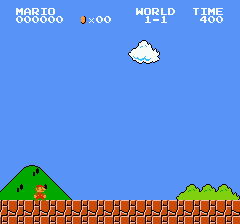

In [ ]:
env = retro.make(game='SuperMarioBros-Nes')
env.reset()
env.step(env.action_space.sample())
img = PIL.Image.fromarray(env.render(mode="rgb_array"))
img

## Hilfsfunktionen definieren
Die folgenden Zellen erstellen ein paar Hilfsfunktionen, welche im Laufe des Projekts genutzt wurden. 

### Combine
Die Funktion führt zwei Arrays, welche nur aus Nullen und Einsen bestehen zusammen. Die Einsen von beiden Arrays werden in ein neues Array übernommen. Die Funktion wird im späteren Verlaufe genutzt, um die Aktionen von lesbaren Texten wie zum Beispiel `"RIGHT"` in Aktionsarrays `[0, 0, 0, 0, 0, 0, 0, 1, 0]` zu überführen. Das erhaltene Array kann genutzt werden um einen weiteren Schritt in der Umgebung auszuführen.

In [ ]:
def takeOneValues(source, target): 
  for idx, value in enumerate(source):
    if value == 1: 
      target[idx] = 1
  return target

def combine(list1, list2): 
  if len(list1) > len(list2): 
    size = len(list1)
  else:
    size = len(list2)
  newList = [0]*size
  takeOneValues(list1, newList)
  takeOneValues(list2, newList)
  return newList


### Überführen der Aktionen in ein Dictionary
Als nächstes wird ein Dictionary erzeugt in dem alle möglichen Aktionen, die in der "Super Mario Bros." Umgebung ausführbar sind, gespeichert werden. Als Key des Dictionaries dient die Text-Repräsentation der Aktionen. Ein Array der Größe 9, welches aus Nullen und Einsen besteht und die Aktion für die Umgebung codiert, bildet den Value. 

In [ ]:
single_actions = {} 

for index in range(9):
  action = [0]*9
  action[index] = 1
  key = env.get_action_meaning(action)
  if len(key) >= 1: key = key[0]
  else: continue
  single_actions[key] = action
  
single_actions

{'A': [0, 0, 0, 0, 0, 0, 0, 0, 1],
 'B': [1, 0, 0, 0, 0, 0, 0, 0, 0],
 'DOWN': [0, 0, 0, 0, 0, 1, 0, 0, 0],
 'LEFT': [0, 0, 0, 0, 0, 0, 1, 0, 0],
 'RIGHT': [0, 0, 0, 0, 0, 0, 0, 1, 0],
 'UP': [0, 0, 0, 0, 1, 0, 0, 0, 0]}

### Definieren der Aktionen die der Agent nutzen soll
Wie oben beschrieben, können Aktionen beliebig miteinander kombiniert werden. Die möglichen Aktionen, die der Agent im Spiel "Super Mario Bros." nutzen soll, werden im Folgenden definiert. Da die Trainingsdauer mit der Gesamtanzahl der Aktionen steigt, wurde der Aktionsraum im Vorhinein reduziert. Der reduzierte Aktionsraum beinhaltet nur noch die Werte um Bewegungen nach rechts in Richtung Ziel durchzuführen.


In [ ]:
actions = [
    ['RIGHT'],
    ['RIGHT', 'A'],
    ['RIGHT', 'B'],
    ['B','RIGHT', 'A']
]

### Überführen der Textwerte in numerische Werte
Zu den definierten Textwerten, wird das dazugehörige numerische Array erzeugt. 


In [ ]:
action_values =  []
for idx, action in enumerate(actions):
  x = []
  for key in action:
    x = combine(x, single_actions[key])
  action_values.append(x)
action_values

[[0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 1]]

### Schließen der Umgebung 
Da in Open-AI Gym nur jeweils eine Umgebung geöffnet sein kann, wird die Testumgebung, welche zum Ermitteln der Aktionswerte genutzt wurde, geschlossen. 

In [ ]:
env.close()

### Definieren von Hyperparametern

Zu Beginn werden die verschiedene Hyperparameter definiert. Die gewählten Parameter orientieren sich an den gewählten Werte aus dem Paper von DeepMind. Aufgrund des nicht ausreichenden Speicherplatzes wurde allerdings die Größe des Replay Buffers verringert.

```
game_name='SuperMarioBros-Nes'
decay_steps=250_000
training_steps=1_000_000
gamma = 0.99
replay_buffer_size=100_000
driver_steps=20_000
```

In [ ]:
game_name='SuperMarioBros-Nes' # @param
decay_steps=250_000 # @param
training_steps=2_000 # @param
gamma = 0.99 #@param {type:"slider", min:0.9, max:1, step:0.01}
replay_buffer_size=100_000 # @param
driver_steps=20_000 # @param

## Super Mario Wrapper
Da "Super Mario Bros" standardmäßig einen Action-Spec mit einer Form von (9,) hat, muss dieser mit einem selbstgeschriebenen Wrapper transformiert werden.

Um einen Umgebungs-Wrapper zu erstellen, sollte von der Klasse `PyEnvironmentBaseWrapper` abgeleitet werden. Die Klasse bietet bereits eine Standardimplementierung der benötigten Methoden eines Wrappers. In der Standardimplementierung der Methoden, wird lediglich die jeweilige Methode der gewrappeten Umgebung durchgereicht. Somit muss in den Wrappern nur noch die Funktionalität, die geändert werden soll, überschrieben werden. 

Der Wrapper `SuperMarioActionWrapper` ist ein Wrapper, der den Aktionsraum der Umgebung überschreibt. Dies ist notwendig, da der Agent `DqnAgent` aus der Bibliothek `TF-Agents` nicht mit einer mehrdimensionalen Aktionsspezifikation arbeiten kann. Der Konstruktor der Klasse, nimmt ein eindimensionales Array von Aktionen entgegen. Diese beinhalten die Aktionen, mit der später die `.step()` Methode angesprochen werden kann. Anschließend wird die Aktionsspezifikation überschrieben. Dazu wird eine Instanz der Klasse `BoundedArraySpec` erzeugt, welche die Form der Spezifikation, den Typ der Aktionen, sowie das Maximum und das Minimum des Aktionsraum, festlegt. 

Weiterhin werden die Methoden `action_spec()`, die die neue Aktionsspezifikation zurückliefert und `_step()`, welche gewählte Aktionen aus der Aktionsspezifikation zunächst auf eine Aktion der Umgebung überführt und anschließend einen Schritt ausführt, überschrieben.

In [ ]:
from tf_agents.environments import PyEnvironmentBaseWrapper
 
class SuperMarioActionWrapper(PyEnvironmentBaseWrapper):
 
  def __init__(self, env, actions=[]):
    super(PyEnvironmentBaseWrapper, self).__init__()
    self._env = env
    self._actions = actions
    self._action_spec = array_spec.BoundedArraySpec(
        shape=(), 
        dtype=np.int32, 
        minimum=0, 
        maximum=len(actions) - 1, 
        name='action'   
    )
      
  def action_spec(self):
    return self._action_spec
 
  def _step(self, action):
    return self._env.step(self._actions[action.item()])

## Wrappen der Umgebungen
Die Umgebung werden mit Hilfe verschiedener Klassen gewrappt. Dies hat den Vorteil, dass das Lernen beschleunigt und optimiert wird. Die selbstgeschrieben Klasse *SuperMarioActionWrapper* wird an dieser Stelle genutzt um den Actionsraum entsprechend anzupassen. In den meisten Papers wird zudem eine Vorverarbeitung der Beobachtungen empfholen. Da die Framerate der Umgebung oft höher ist als für das Training notwendig, wird nur jeder vierte Frame beachtet. Eine weiere Optimierung des Training ist das Konvertieren der Beobachtung in ein Graustufen-Bild, sowie das herunterskalieren der *Beobachtung* auf 84x84 Pixel. Dies hat den Vorteil, dass die *Beobachtung* von der Größe her veringert wird, wodurch Speicherplatz im *Replay Buffer* gespart wird und das Training beschleunigt wird, ohne einen Informationsverlust in Kauf nehmen zu müssen. Da der Agent auf der Grundlage eines Bildes nicht entscheiden kann, in welche Richtung sich die verschiedenen Objekte in der Umgebung bewegen, wird die Umgebung mit einem FrameStack gewrappt. Der *FrameStack* sammelt die letzten vier Beobachtungen und lässt diese anschließend in das Training einfließen.

In [ ]:
gym_env_wrappers = [
      lambda env: retro_wrappers.StochasticFrameSkip(env, 4, 1.0), 
      lambda env: gym.wrappers.GrayScaleObservation(env, keep_dim=True),
      lambda env: gym.wrappers.ResizeObservation(env, (84)),
      lambda env: gym.wrappers.FrameStack(env, 4)
]

In [ ]:
env_wrappers = [
      lambda env: SuperMarioActionWrapper(env, action_values),
]

In [ ]:
game = retro.make(game_name)
py_env = suite_gym.wrap_env(
    game,
    gym_env_wrappers=gym_env_wrappers,
    env_wrappers=env_wrappers
)

Mit Hilfe der Funktion _validate_py_environment_ kann sichergestellt werden, dass die Umgebung korrekt konfiguriert wurde und den definierten Spezifikation folgt. Der Aufruf nutzt eine Zufalls-Policy um Aktionen zun generieren. Insgesamt wird Umgebung einmal durchlaufen um zu validieren, dass die Konfiguration korrekt umgesetzt wurd. Wird ein _time_step_ empfangen, der nicht zu Spezifikationen der Umgebung passt,tritt ein Fehler auf.

In [ ]:
utils.validate_py_environment(py_env, episodes=1)

Nachdem die Umgebungen mit den entsprechenden Wrappern vorverarbeitet wurde, kann im Anschluss die Python Umgebung in eine TensorFlow-Umgebung umgewandelt werden.  [@TFAgents-Environments]

In [ ]:
env = tf_py_environment.TFPyEnvironment(py_env)

#### Erstellen der Policy

Da die Beobachtung ein Graustufen-Bild in der Größe 84px x 84px liefert, wird als Policy ein Convolutional Neuronal Network genutzt. TF-Agents liefert bereits das Grundgerüst für ein QNetwork. Das QNetwork kann über den Konstruktor nach Bedarf angepasst werden. Zunächst wird eine Preprocessing-Schicht eingeführt, die die Beobachtung entgegennimmt und normalisiert. Ein Erweitern des QNetwork um Convolutional-Schichten erfolgt über den Parameter *conv_layer_params*. Die erste Schicht, besteht aus 32 8x8-Filter mit einer Schritweite von 4. Daraufhin folgt eine Schicht mit 64 4x4-Filtern mit einer Schrittweite von 2 und zum Schluss eine Schicht mit 64 3x3-Filtern mit einer Schrittweite von 1. Die Convolutional-Schichten werden mit einer Dense-Schicht von 512 Einheiten verbunden, welche mit von einer Ausgabeschicht mit der Größe des Actions-Specs gefolgt wird. Als Aktivierungsfunktion für die Convolutional Schichten sowie der Dense-Schicht mit 512 Einheiten wird die ReLu-Funktion genutzt. [@ML-Book, 654]

In [ ]:
perprocessing_layer = tf.keras.layers.Lambda(
   lambda obs: tf.cast(obs, np.float32) / 255.)

conv_layer_params=[
                   (32, (8, 8), 4), 
                   (64, (4, 4), 2), 
                   (64, (3, 3), 1)
              ]
fc_layer_params = [512]

q_net = QNetwork(
    env.observation_spec(),
    env.action_spec(),
    preprocessing_layers=perprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params
)

Nachdem ein Neuronales Netz als Policy erstellt wurde, wird im nächsten Schritt der Agent erstellt. Als Optimizer wird der RMSprop-Algorithmus genutzt. Zudem wird wird ein Step-Counter erstellt, welcher jedes mal inkrementiert wird, sobald eine Trainingsrunde durchgeführt wurde. Die _Epsilon-Greedy Policy_ wird mit Hilfe der Klasse _PolynomialDecay_ realisiert. Die $\epsilon$-Werte werden somit während des Trainings Stück für Stück veringert. [@ML-Book]

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=2.5e-4, rho=0.95, momentum=0.0, epsilon=0.00001, centered=True)

train_step_counter = tf.Variable(0)

epsilon_fn = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1.0,
    decay_steps=decay_steps // 4,
    end_learning_rate=0.01
)

agent = dqn_agent.DqnAgent(
    env.time_step_spec(),
    env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    target_update_period=2000,
    td_errors_loss_fn=tf.keras.losses.Huber(reduction="none"),
    gamma=gamma,
    train_step_counter=train_step_counter,
    epsilon_greedy=lambda: epsilon_fn(train_step_counter)
)

agent.initialize()

Das Training wird durch Hinzunahme eines Replay Buffers deutlich beschleunigt.

In [ ]:
replay_buffer = TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=env.batch_size,
    max_length=replay_buffer_size
)

## Metriken erstellen
Als nächstes werden Metriken erstellt. Als Metrik wird die Anzahl an Episoden, die Schritte die in der Umgebung ausgeführt wurden, sowie ein Histogramm der gewählten Aktionen mitgeschnitten und im Anschluss ausgewertet.

In [ ]:
train_metrics = [
      tf_metrics.NumberOfEpisodes(),
      tf_metrics.EnvironmentSteps(),
      tf_metrics.ChosenActionHistogram()
]

observers = [replay_buffer.add_batch] + train_metrics

Der Stepdriver sammelt alle 4 Schritte die Erfahrungen ein und schreibt diese in den Replay-Buffer. [@ML-Book, 659]

In [ ]:
collect_driver = DynamicStepDriver(
    env,
    agent.collect_policy,
    observers=observers,
    num_steps=4
)

### Vorbefüllen des Replaybuffers 
 
Der Replay Buffer wird zunächst mit Hilfe einer zufälligen Policy vorgefüllt. Das beschleunigt und stabilisiert das Training. [@ML-Book, 659]

In [ ]:
init_policy = RandomTFPolicy(
    env.time_step_spec(),
    env.action_spec()
)

init_driver = DynamicStepDriver(
    env,
    init_policy,
    observers=observers,
    num_steps=driver_steps
)

final_time_step, final_policy_state = init_driver.run()

## Erstellen eines Datasets

Der Replay Buffer wird in ein Dataset konvertiert. Das hat den Vorteil, dass von der Leistungsfähigkeit der Data-API wie Paralelisierung und Prefetching profitiert wird. [@ML-Book, 662]

In [ ]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
    num_parallel_calls=3
).prefetch(3)

Instructions for updating:
Use `tf.data.Dataset.scan(...) instead
Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


## Trainingsschleife erstellen

Die _run_-Funktion des Collect-Drivers und die _train_-Funktion des Agenten werden mit der der Utility-Funktion _function_ aus TF-Agents verpackt. Das beschleunigt das Training indem die Funktionen in TensorFlow-Functions umgewandelt werden.

In [ ]:
collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

Die in der folgenden Zelle definierte Funktion _train_agents_ dient zur Durchführung des Trainings. Die Anzahl der Trainingsiterationen kann über den Parameter entsprechend angepasst werden. Die Methode ermittelt zunächst mit Hilfe der Collect-Policy des Agents den initialen Status. Als nächstes wird ein Iterator über das Dataset erstellt. Daraufhin folgt die Trainingsschleife, welche _n_iterations_-Schritte läuft, bei jedem Schritt die Erfahrungen sammelt, in den _Replay Buffer_ schreibt, das Training durchführt und zum Schluss die Metriken protokoliert [@ML-Book, 663]

In [ ]:
def train_agent(n_iterations = 1000):
  time_step = None
  policy_state = agent.collect_policy.get_initial_state(env.batch_size)
  iterator = iter(dataset)
  for iteration in range(n_iterations):
    time_step, policy_state = collect_driver.run(time_step, policy_state)
    trajectories, buffer_info = next(iterator)
    train_loss = agent.train(trajectories)
    print("\r{}/{} loss:{:.3f}".format(
        iteration, n_iterations, train_loss.loss.numpy()), end=""
    )
    if iteration % 100 == 0:
      log_metrics(train_metrics)

In [ ]:
train_agent(training_steps)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
1999/2000 loss:0.151

Nachdem das Training erfolgreich durchgelaufen ist, wird das trainierte Model gespeichert. [@TFAgents-PolicySaver]

In [ ]:
tempdir = os.getenv("TEST_TMPDIR", tempfile.gettempdir())
policy_dir  = os.path.join(tempdir, 'policy')

tf_policy_saver = policy_saver.PolicySaver(agent.policy)
tf_policy_saver.save(policy_dir)

## Erstellen eines Videos

Um die Performance des erstellten Models zu darzustellen wird in den folgenden Zellen mit Hilfe von Python ein Video erzeugt und entsprechend eingebunden. 

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  </video>'''.format(b64.decode())
 
  return IPython.display.HTML(tag)

In [ ]:
def create_video(policy, filename='imageio', num_episodes=5, fps=30):
  video_filename = filename + '.mp4'
  with imageio.get_writer(video_filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = env.reset()
      video.append_data(py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = env.step(action_step.action)
        video.append_data(py_env.render())
  return embed_mp4(video_filename)

In [ ]:
create_video(agent.policy, filename='validation', num_episodes=3, fps=30)

In [ ]:
env.close()

# Fazit zur Ausarbeitung
Im Rahmen dieser Hausarbeit wurden sowohl wichtige Erfahrungen im Bezug auf Reinforcement Learning, als auch im Umgang mit den eingesetzten Bibliotheken gesammelt. In Bezug auf Reinforcement Learning lässt sich festhalten, dass zunächst nur der DQN-Algorithmus genutzt wurde, welcher zu dein Einstiegsalgorithmen im Bereich Reinforcement Learning gehört. Komplexere Algorithmen wie PPO oder Rainbow wurden im Rahmen der Hausarbeit zwar nicht betrachtet, bieten aber weitere Möglichkeiten das Problem des Spielens von "Super Mario Bros." gegebenenfalls performanter und effektiver zu lösen. Des Weiteren wurde um die Laufzeit des Algorithmus gering zu halten, der Aktionsraum eingeschränkt, was zur Folge hat, dass der Agent, die Figur nur nach einem bestimmten Muster steuern und sich keine Schritte zurückbewegen kann. Um den gesamten Aktionsraum im Trainigsprozess zu beachten, sollte somit ein anderer Algorithmus gewählt werden. 

Zu TF-Agents ist festzuhalten, dass es sich um eine Bibliothek handelt, die zwar insgesamt funktioniert, allerdings noch nicht ausgereift ist. Bei vielen Fehlern die während der Implementierung auftraten, war es teilweise sehr aufwändig die Ursache als auch die Lösungen zu den Fehlern zu finden. Aufgrunddessen musste ich mir verhältnismäßig oft die Implementierung der Agenten und Umgebungen anschauen um zu ermitteln in welchem Format die Bibliothek zum Beispiel die _Beobachtungen_ haben möchte oder wie die Aktionsspezifikation aussehen muss. Ein weiterer Kritikpunkt bezüglich TF-Agents ist die verhältnismäßig minderwertige Dokumentation. Viele Funktionen der Bibliothek sind nur kurz oder teilweise gar nicht dokumentiert und müssen manuell betractet werden. 

Abschließend ist zu sagen, dass Reinforcement Learning ein sehr spannendes Thema ist, in dem aktuell viel geforscht. Es werden stetig neue und bessere Algorithmen entwickelt, welche bessere Ergebnisse als die vorherigen Algorithmen liefern. Trotzdem bleibt Reinforcement Learning ein komplexes Thema. Insgesamt mussten die Parameter oft angepasst werden um überhaupt zufriedenstellende Ergebnisse zu erhalten. Zudem benötigen die Algorithmen sehr viel Zeit und Rechenleistung, was den Prozess stark entschleunigte. Insgesamt wurde jedoch mit dem gewählten Algorithmus das Ziel der Hausarbeit, das erste Level in "Super Mario Bros." zu schaffen, erreicht. 

# Literaturverzeichnis
